# ------------MODELO NO SUPERVISADO------------

## Importo las librerias a utilizar para el modelo

In [1]:
import pandas as pd
from sklearn.cluster import KMeansimporto 
from sklearn.metrics import silhouette_score

## Cargo el data set de testeo

In [2]:
df_inm_test=pd.read_parquet('test.parquet')

## Visualizo las primeras 5 filas del Data Frame para analizar la información

In [3]:
df_inm_test.head(5) 

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,apartment,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,fort collins / north CO,https://fortcollins.craigslist.org,apartment,1280,2,2.5,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,charlottesville,https://charlottesville.craigslist.org,apartment,783,2,1.0,1,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


## Despues de ver los datos y analizarlos quito del data frame las columnas que no voy a utilizar

In [4]:
df_inm_test.drop(["id", "url", "region_url", 
 "image_url", "description", "state", 'lat', 'long'], axis = 'columns', inplace=True)

In [5]:
df_inm_test.head(2)

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,ann arbor,manufactured,1344,3,2.0,0,0,1,0,0,0,w/d in unit,off-street parking
1,vermont,apartment,1050,2,1.0,0,0,1,0,0,0,w/d hookups,off-street parking


## Veo la información del Data Set

In [6]:
df_inm_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   38498 non-null  object 
 1   type                     38498 non-null  object 
 2   sqfeet                   38498 non-null  int64  
 3   beds                     38498 non-null  int64  
 4   baths                    38498 non-null  float64
 5   cats_allowed             38498 non-null  int64  
 6   dogs_allowed             38498 non-null  int64  
 7   smoking_allowed          38498 non-null  int64  
 8   wheelchair_access        38498 non-null  int64  
 9   electric_vehicle_charge  38498 non-null  int64  
 10  comes_furnished          38498 non-null  int64  
 11  laundry_options          30643 non-null  object 
 12  parking_options          24493 non-null  object 
dtypes: float64(1), int64(8), object(4)
memory usage: 3.8+ MB


## Verifico los duplicados y veo que hay muchos asi que los elimino 

In [7]:
df_inm_test.duplicated().sum() 
df_inm_test.drop_duplicates(inplace=True)

In [8]:
df_inm_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25164 entries, 0 to 38497
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   25164 non-null  object 
 1   type                     25164 non-null  object 
 2   sqfeet                   25164 non-null  int64  
 3   beds                     25164 non-null  int64  
 4   baths                    25164 non-null  float64
 5   cats_allowed             25164 non-null  int64  
 6   dogs_allowed             25164 non-null  int64  
 7   smoking_allowed          25164 non-null  int64  
 8   wheelchair_access        25164 non-null  int64  
 9   electric_vehicle_charge  25164 non-null  int64  
 10  comes_furnished          25164 non-null  int64  
 11  laundry_options          20383 non-null  object 
 12  parking_options          16822 non-null  object 
dtypes: float64(1), int64(8), object(4)
memory usage: 2.7+ MB


## Reemplazo los valores nulos por 'no laundry in site', ya que considero que no es que no haya dato sino que el valor nulo representa que no hay lavadero en el lugar 

In [9]:
df_inm_test['laundry_options'].fillna('no laundry on site', inplace=True)  

## Lo mismo que en la columna anterior pero en parking

In [10]:
df_inm_test['parking_options'].fillna('no parking', inplace=True) 

 ## Vuelvo a verificar que no haya nulos

In [11]:
df_inm_test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25164 entries, 0 to 38497
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   25164 non-null  object 
 1   type                     25164 non-null  object 
 2   sqfeet                   25164 non-null  int64  
 3   beds                     25164 non-null  int64  
 4   baths                    25164 non-null  float64
 5   cats_allowed             25164 non-null  int64  
 6   dogs_allowed             25164 non-null  int64  
 7   smoking_allowed          25164 non-null  int64  
 8   wheelchair_access        25164 non-null  int64  
 9   electric_vehicle_charge  25164 non-null  int64  
 10  comes_furnished          25164 non-null  int64  
 11  laundry_options          25164 non-null  object 
 12  parking_options          25164 non-null  object 
dtypes: float64(1), int64(8), object(4)
memory usage: 2.7+ MB


## Creo columnas con las variables de 'laundry', 'parking' y 'type'

In [12]:
dummies_laundry=pd.get_dummies(df_inm_test.laundry_options)
df_inm_test = pd.concat([df_inm_test, dummies_laundry], axis=1,) 

In [13]:
dummies_parking=pd.get_dummies(df_inm_test.parking_options)
df_inm_test = pd.concat([df_inm_test, dummies_parking], axis=1,) 

In [14]:
dummies_type=pd.get_dummies(df_inm_test.type)
df_inm_test = pd.concat([df_inm_test, dummies_type], axis=1,)  

## Elimino las columnas que ya no voy a utilizar con variables cualitativas.

In [15]:
del df_inm_test['laundry_options']
del df_inm_test['parking_options']
del df_inm_test['type'] 

## Verifico que region tiene muchas categorias de datos por lo que es mejor eliminarla 

In [16]:
df_inm_test['region'].value_counts() 

portland          253
austin            240
seattle-tacoma    235
denver            224
rochester         224
                 ... 
brainerd            1
southwest MS        1
farmington          1
northwest KS        1
ashtabula           1
Name: region, Length: 398, dtype: int64

In [17]:
del df_inm_test['region']

## Veo los valores estadisticos del data set

In [18]:
df_inm_test.describe() 

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry in bldg,...,apartment,condo,cottage/cabin,duplex,flat,house,in-law,loft,manufactured,townhouse
count,25164.000000,25164.000000,25164.000000,25164.000000,25164.000000,25164.000000,25164.000000,25164.000000,25164.000000,25164.000000,...,25164.000000,25164.000000,25164.000000,25164.000000,25164.000000,25164.000000,25164.000000,25164.000000,25164.000000,25164.000000
mean,1037.842275,1.992529,1.497934,0.699770,0.677992,0.693173,0.088539,0.017763,0.053926,0.099348,...,0.769115,0.022850,0.003179,0.018677,0.002305,0.123033,0.000755,0.002702,0.012876,0.044508
std,823.236456,6.984056,0.768818,0.458367,0.467255,0.461186,0.284083,0.132093,0.225877,0.299135,...,0.421408,0.149428,0.056295,0.135386,0.047955,0.328482,0.027468,0.051914,0.112740,0.206225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,754.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,955.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1191.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95242.000000,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Importo librerias para buscar valores atipicos

In [19]:
import sklearn
from sklearn.datasets import load_boston 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Grafico 'beds' en busqueda de valores atípicos.

<AxesSubplot: >

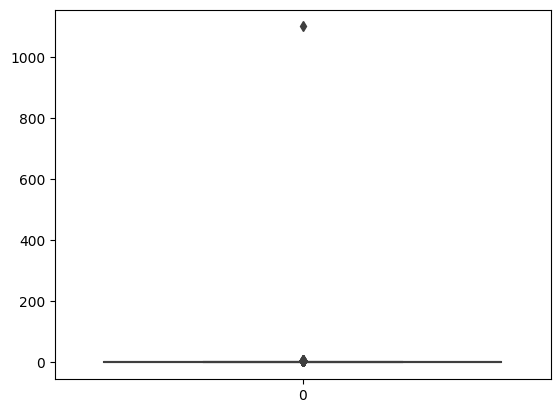

In [20]:
sns.boxplot(df_inm_test['beds'])
#sns.boxplot(df_inm_test['sqfeet'])

## Creo las variables para marcar los limites de valores atípicos

In [21]:
lower_beds = df_inm_test.beds.quantile(0.25)
upper_beds = df_inm_test.beds.quantile(0.95)

## Quito Valores atípicosy lo guardo notra variable 

In [23]:
df_filtered = df_inm_test[(df_inm_test["beds"] < 5) & (df_inm_test["beds"] > 0)]


## Grafico 'beds' para ver los resultados.

<AxesSubplot: >

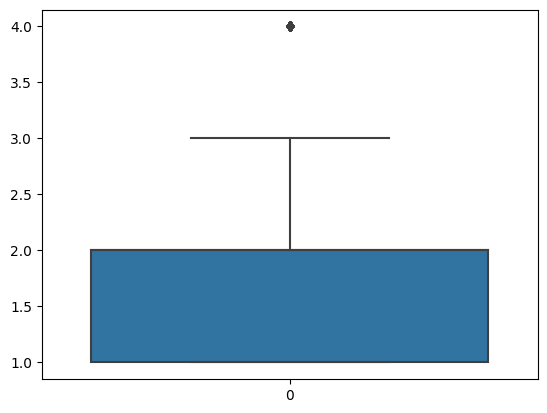

In [24]:
sns.boxplot(df_filtered['beds'])

## Grafico 'sqfeet' en busqueda de valores atípicos.

<AxesSubplot: >

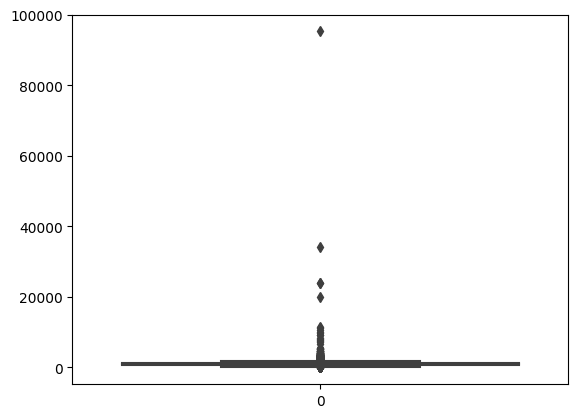

In [25]:
sns.boxplot(df_filtered['sqfeet'])

## Creo los rangos de eliminacion de valores atípicos segun el grafico anterior

In [26]:
df_filtered = df_inm_test[(df_inm_test["sqfeet"] < 3000) & (df_inm_test["sqfeet"] > 50)]


## Verifico como quedo 'sqfeet' 

<AxesSubplot: >

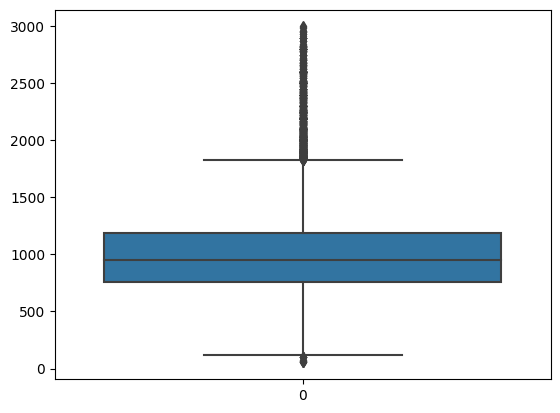

In [29]:
sns.boxplot(df_filtered['sqfeet'])

## Grafico 'Baths' en búsqueda de valores atípicos

<AxesSubplot: >

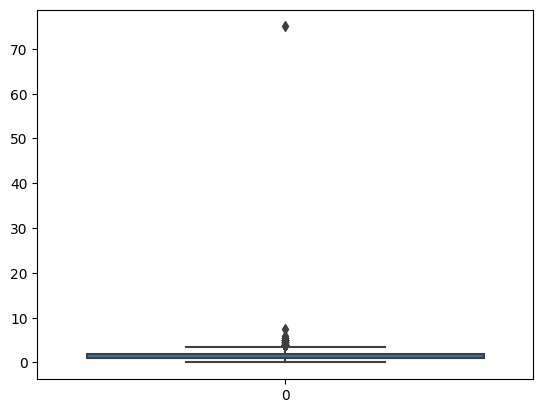

In [32]:
sns.boxplot(df_filtered['baths'])

## Elimino valores atípicos segun el grafico anterior

In [33]:
df_filtered = df_inm_test[(df_inm_test["baths"] < 5) & (df_inm_test["baths"] > 0)]

## Vuelvo a graficar para ver como quedo 'Baths'

<AxesSubplot: >

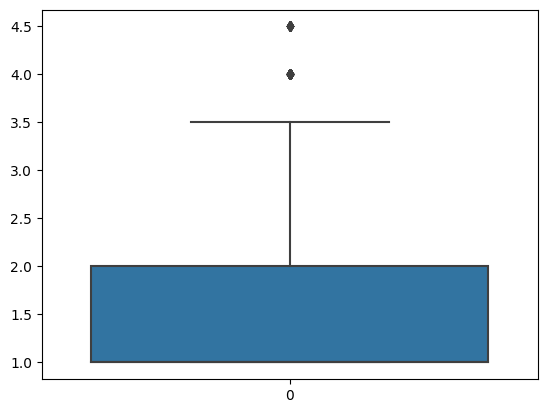

In [34]:
sns.boxplot(df_filtered['baths'])

## Importo K Means para hacer el modelo de predicción

In [50]:
from sklearn.cluster import KMeans

## Indico la cantidad de clusters, ajusto el dataset al modelo que voy a utilizar y hago la predicción.

In [43]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(df_filtered)
clusters = kmeans.predict(df_filtered)

## Los valores del array clusters van a la columna pred que creo, hago un mapeo y efectivizo la asignacion

In [45]:
df_filtered['pred'] = clusters
cluster_mapping = {0: 0, 1: 1, 2: 2} 
df_filtered['pred'] = df_filtered['pred'].map(cluster_mapping)
df_filtered

C:\Users\LUIS RODRIGUEZ\AppData\Local\Temp\ipykernel_8100\656958058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pred'] = clusters#los valores del array clusters van a la columna pred que creo.
C:\Users\LUIS RODRIGUEZ\AppData\Local\Temp\ipykernel_8100\656958058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pred'] = df_filtered['pred'].map(cluster_mapping)#Efectivizo la asignacion


,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry in bldg,...,condo,cottage/cabin,duplex,flat,house,in-law,loft,manufactured,townhouse,pred
0,1344,3,2.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1050,2,1.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1150,2,2.0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1280,2,2.5,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,783,2,1.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,1180,2,2.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38494,1138,3,2.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38495,743,1,1.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38496,1276,3,2.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


 ## Calculo el silhouette score

In [46]:
df_test_original = df_filtered.drop(columns=['pred'])            #calculo el silhouette score
labels = kmeans.predict(df_test_original)
score = silhouette_score(df_test_original, labels)
print("Silhouette Score: {:.3f}".format(score))

Silhouette Score: 0.658


## Transformo la columna pred como csv

In [48]:
df_filtered[["pred"]].to_csv("juangarciare.csv", index=False)

## Verifico que el csv este cargado correctamente

In [10]:
final=pd.read_csv('juangarciare.csv')
final

,pred
0,1
1,0
2,0
3,1
4,0
...,...
38493,0
38494,0
38495,0
38496,1
